<a href="https://colab.research.google.com/github/ArnyWu/-Preview-AI-/blob/main/%E6%8A%80%E8%A1%93%E6%8C%87%E6%A8%99%E8%88%87K%E7%B7%9A%E5%9E%8B%E6%85%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

--2024-09-27 06:56:41--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.202.138, 173.194.202.102, 173.194.202.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.202.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-09-27 06:56:41--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.107.132, 2607:f8b0:400e:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   127MB/s    in 0.2s    

2024-09-27 

# <b>作業要求</b>
### 1. 延用上週爬取的股價資料
### 2. 計算技術指標（SMA、RSI、MACD）
### 3. 可視化 K 線圖
### 4. 使用技術指標結合機器學習（線性回歸、決策樹、隨機森林）預測股價漲跌。技術指標作為特徵來預測第 n 天的股價

# <b>取得股價資料</b>

In [2]:
!pip install yfinance

In [3]:
!pip install mplfinance

In [4]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [41]:
# 輸入股票代號
stock_id = "2615.tw" #萬海
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=180)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-04-01,44.299999,44.700001,44.150002,44.549999,43.744877,3005049
1,2024-04-02,44.700001,44.700001,43.950001,44.049999,43.253914,4368922
2,2024-04-03,44.049999,44.099998,43.650002,43.650002,42.861145,5394490
3,2024-04-08,43.750000,44.299999,43.200001,44.099998,43.303009,6083440
4,2024-04-09,44.200001,45.099998,44.200001,44.950001,44.137650,7106870
...,...,...,...,...,...,...,...
117,2024-09-20,82.400002,82.400002,80.199997,81.099998,81.099998,13110284
118,2024-09-23,81.699997,82.800003,81.500000,82.500000,82.500000,19377044
119,2024-09-24,83.000000,90.699997,82.800003,90.699997,90.699997,99592831
120,2024-09-25,92.099998,99.699997,91.400002,99.699997,99.699997,152360979


# <b>1. 技術指標的計算</b>
移動動平均線（MA）、相對強弱指數（RSI）、平滑異同移動平均線（MACD）


## 1.1 計算簡單移動平均線（SMA）

In [42]:
# 計算8日 SMA
df['8_SMA'] = df['Close'].rolling(window=8).mean()

# 計算30日 SMA
df['13_SMA'] = df['Close'].rolling(window=13).mean()

# 計算100日 SMA
df['20_SMA'] = df['Close'].rolling(window=20).mean()

# 列印最後筆數
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA
117,2024-09-20,82.400002,82.400002,80.199997,81.099998,81.099998,13110284,78.587500,78.392307,78.825000
118,2024-09-23,81.699997,82.800003,81.500000,82.500000,82.500000,19377044,79.637500,78.623076,78.975000
119,2024-09-24,83.000000,90.699997,82.800003,90.699997,90.699997,99592831,81.374999,79.546153,79.514999
120,2024-09-25,92.099998,99.699997,91.400002,99.699997,99.699997,152360979,84.124999,81.153845,80.584999
121,2024-09-26,100.500000,106.000000,100.000000,102.000000,102.000000,133581031,86.974999,82.984614,81.779999


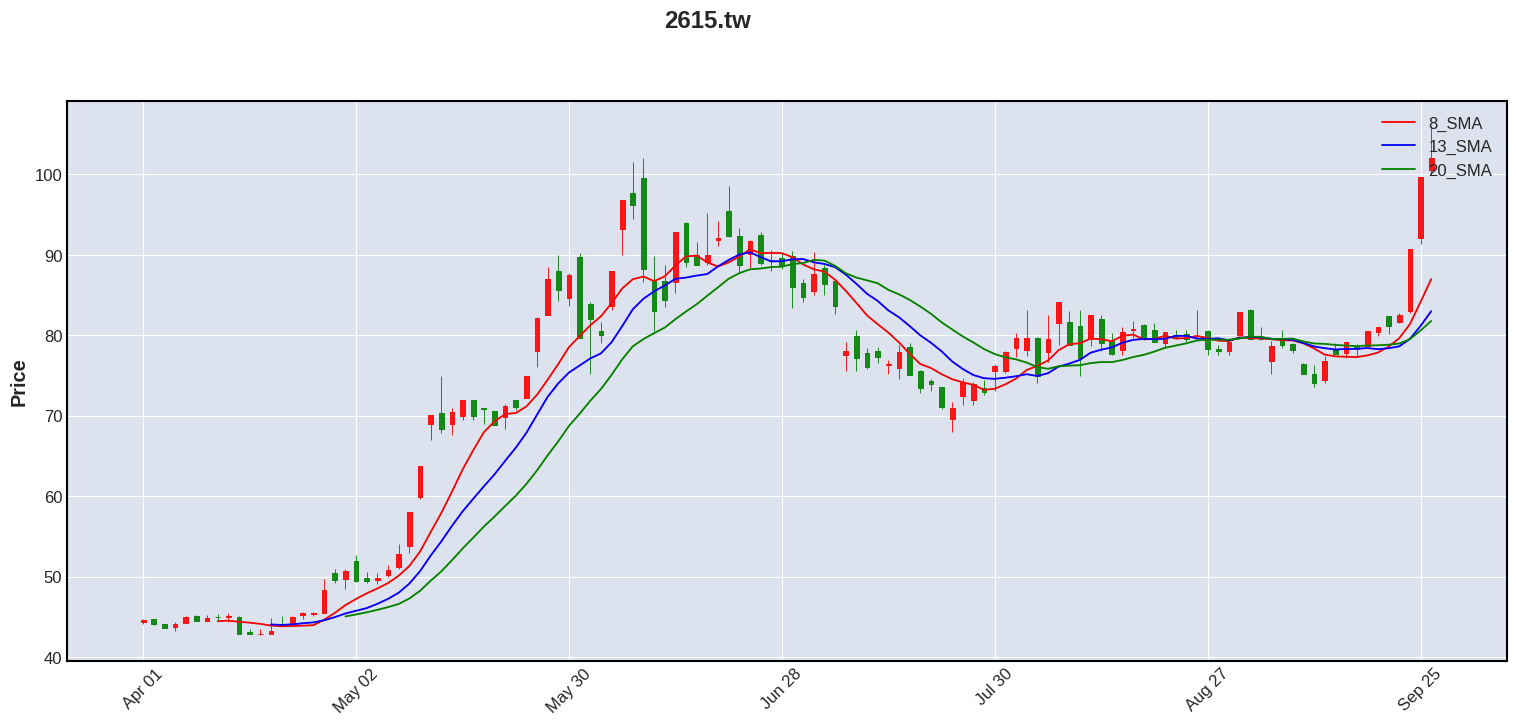

In [43]:
import mplfinance as mpf
import matplotlib.pyplot as plt

# 確保索引是日期格式且包含時間
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 選擇要顯示的K線圖資料欄位
kplot_df = df[['Open', 'High', 'Low', 'Close']]

# 設置K線顏色風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default', marketcolors=my_color)

# 使用mplfinance繪製K線圖，並加上SMA
mpf.plot(
    kplot_df,
    type='candle',
    style=my_style,
    title=f'{stock_id}',
    figsize=(20, 8),
    mav=(8, 13, 20),  # 顯示8日、13日、20日SMA
    addplot=[
        mpf.make_addplot(df['8_SMA'], color='red', label='8_SMA'),
        mpf.make_addplot(df['13_SMA'], color='blue', label='13_SMA'),
        mpf.make_addplot(df['20_SMA'], color='green', label='20_SMA')
    ]
)
plt.show()

In [8]:
# 計算8日 EMA
df['8_EMA'] = df['Close'].ewm(span=8, adjust=False).mean()
# 計算13日 EMA
df['13_EMA'] = df['Close'].ewm(span=13, adjust=False).mean()
# 計算20日 EMA
df['20_EMA'] = df['Close'].ewm(span=20, adjust=False).mean()


# 列印最後幾筆資料
df.tail()

,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,8_EMA,13_EMA,20_EMA
Date,,,,,,,,,,,,
2024-09-20,82.400002,82.400002,80.199997,81.099998,81.099998,13110284,78.587500,78.392307,78.825000,79.478035,79.105893,78.961280
2024-09-23,81.699997,82.800003,81.500000,82.500000,82.500000,19377044,79.637500,78.623076,78.975000,80.149583,79.590765,79.298301
2024-09-24,83.000000,90.699997,82.800003,90.699997,90.699997,99592831,81.374999,79.546153,79.514999,82.494120,81.177798,80.384177
2024-09-25,92.099998,99.699997,91.400002,99.699997,99.699997,152360979,84.124999,81.153845,80.584999,86.317648,83.823827,82.223779
2024-09-26,100.500000,106.000000,100.000000,102.000000,102.000000,133581031,86.974999,82.984614,81.779999,89.802615,86.420423,84.107228


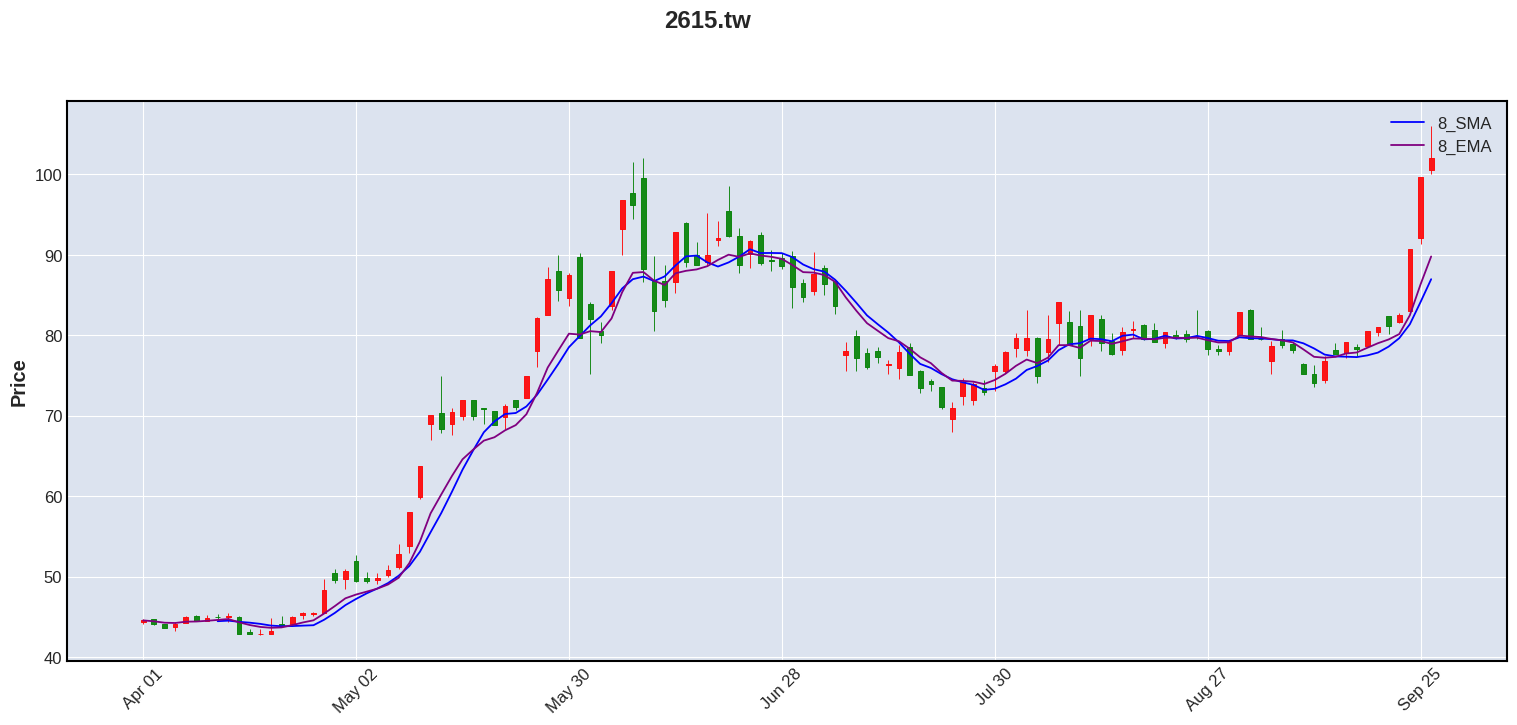

In [9]:
# 選擇要顯示的K線圖資料欄位
kplot_df = df[['Open', 'High', 'Low', 'Close']]

# 設置K線顏色風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default', marketcolors=my_color)

# 使用mplfinance繪製K線圖，並加上EMA
mpf.plot(
    kplot_df,
    type='candle',
    style=my_style,
    title=f'{stock_id}',
    figsize=(20, 8),
    addplot=[
        mpf.make_addplot(df['8_SMA'], color='blue', label='8_SMA'),
        mpf.make_addplot(df['8_EMA'], color='purple', label='8_EMA')
    ]
)


# 顯示圖表
plt.show()

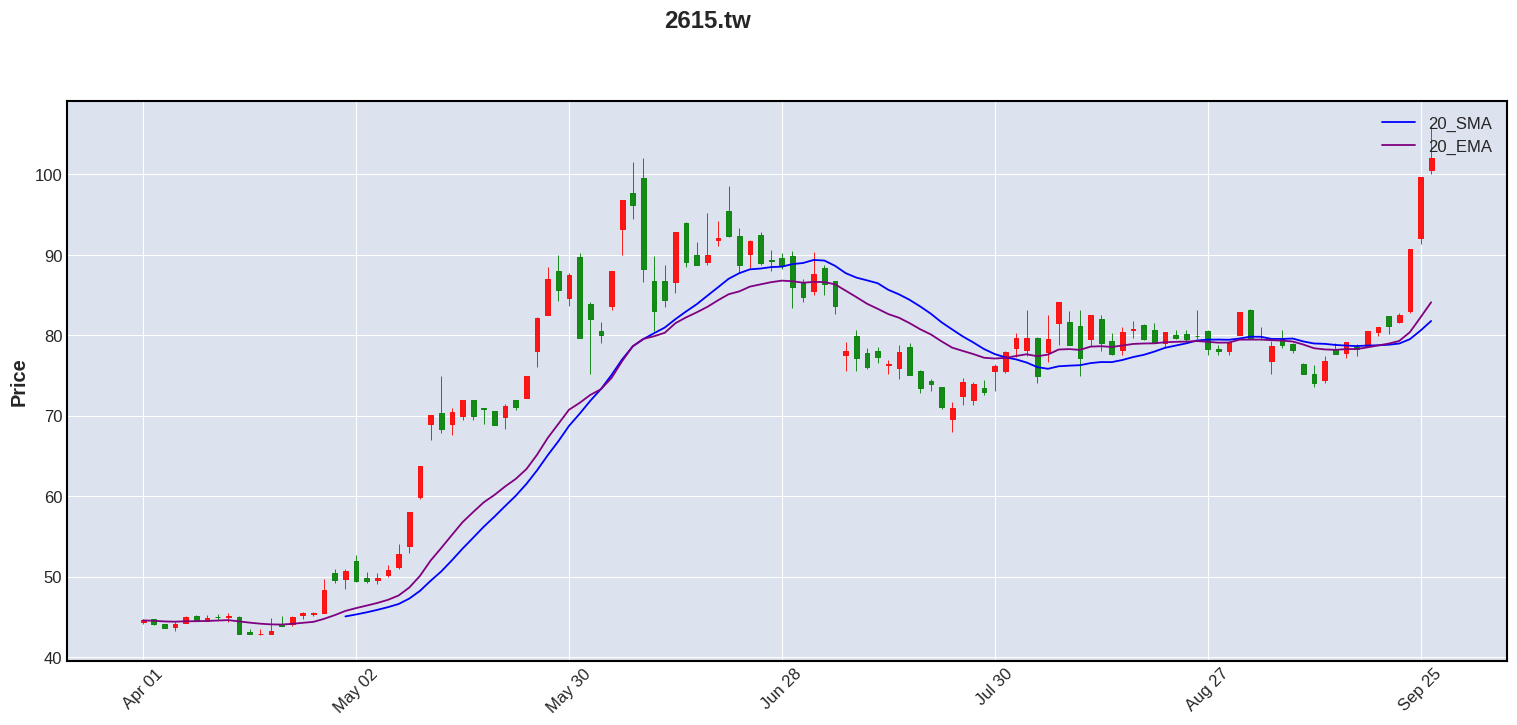

In [10]:
# 選擇要顯示的K線圖資料欄位
kplot_df = df[['Open', 'High', 'Low', 'Close']]

# 設置K線顏色風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default', marketcolors=my_color)

# 使用mplfinance繪製K線圖，並加上EMA
mpf.plot(
    kplot_df,
    type='candle',
    style=my_style,
    title=f'{stock_id}',
    figsize=(20, 8),
    addplot=[
        mpf.make_addplot(df['20_SMA'], color='blue', label='20_SMA'),
        mpf.make_addplot(df['20_EMA'], color='purple', label='20_EMA')
    ]
)


# 顯示圖表
plt.show()

## 1.2 計算相對強弱指數（RSI）

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-01.jpg" alt="rsi" width="500"/>

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-02.jpg" alt="rs" width="500"/>

In [11]:
# 計算每個交易日的價格變動，即當天收盤價與前一天收盤價的差異
df['Change'] = df['Close'] - df['Close'].shift(1)

# 將變動值中的正數部分視為“Gain”（增益），如果變動為負則記為0
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

# 將變動值中的負數部分視為“Loss”（損失），取其絕對值，如果變動為正則記為0
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

df.tail()

# 計算過去14個交易日的平均增益
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()

# 計算過去14個交易日的平均損失
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()

# 計算相對強弱指數的相對強度（RS），即平均增益與平均損失的比值
df['RS'] = df['Avg Gain'] / df['Avg Loss']

# 計算相對強弱指數（RSI），使用RS公式計算出來
df['RSI'] = 100 - (100 / (1 + df['RS']))

# 顯示最後幾行的數據
df.tail()

,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,8_EMA,13_EMA,20_EMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
Date,,,,,,,,,,,,,,,,,,,
2024-09-20,82.400002,82.400002,80.199997,81.099998,81.099998,13110284,78.587500,78.392307,78.825000,79.478035,79.105893,78.961280,0.099998,0.099998,0.0,0.571429,0.700000,0.816326,44.943813
2024-09-23,81.699997,82.800003,81.500000,82.500000,82.500000,19377044,79.637500,78.623076,78.975000,80.149583,79.590765,79.298301,1.400002,1.400002,0.0,0.671429,0.457143,1.468750,59.493669
2024-09-24,83.000000,90.699997,82.800003,90.699997,90.699997,99592831,81.374999,79.546153,79.514999,82.494120,81.177798,80.384177,8.199997,8.199997,0.0,1.257143,0.457143,2.749999,73.333327
2024-09-25,92.099998,99.699997,91.400002,99.699997,99.699997,152360979,84.124999,81.153845,80.584999,86.317648,83.823827,82.223779,9.000000,9.000000,0.0,1.900000,0.400000,4.750001,82.608699
2024-09-26,100.500000,106.000000,100.000000,102.000000,102.000000,133581031,86.974999,82.984614,81.779999,89.802615,86.420423,84.107228,2.300003,2.300003,0.0,2.057143,0.400000,5.142858,83.720932


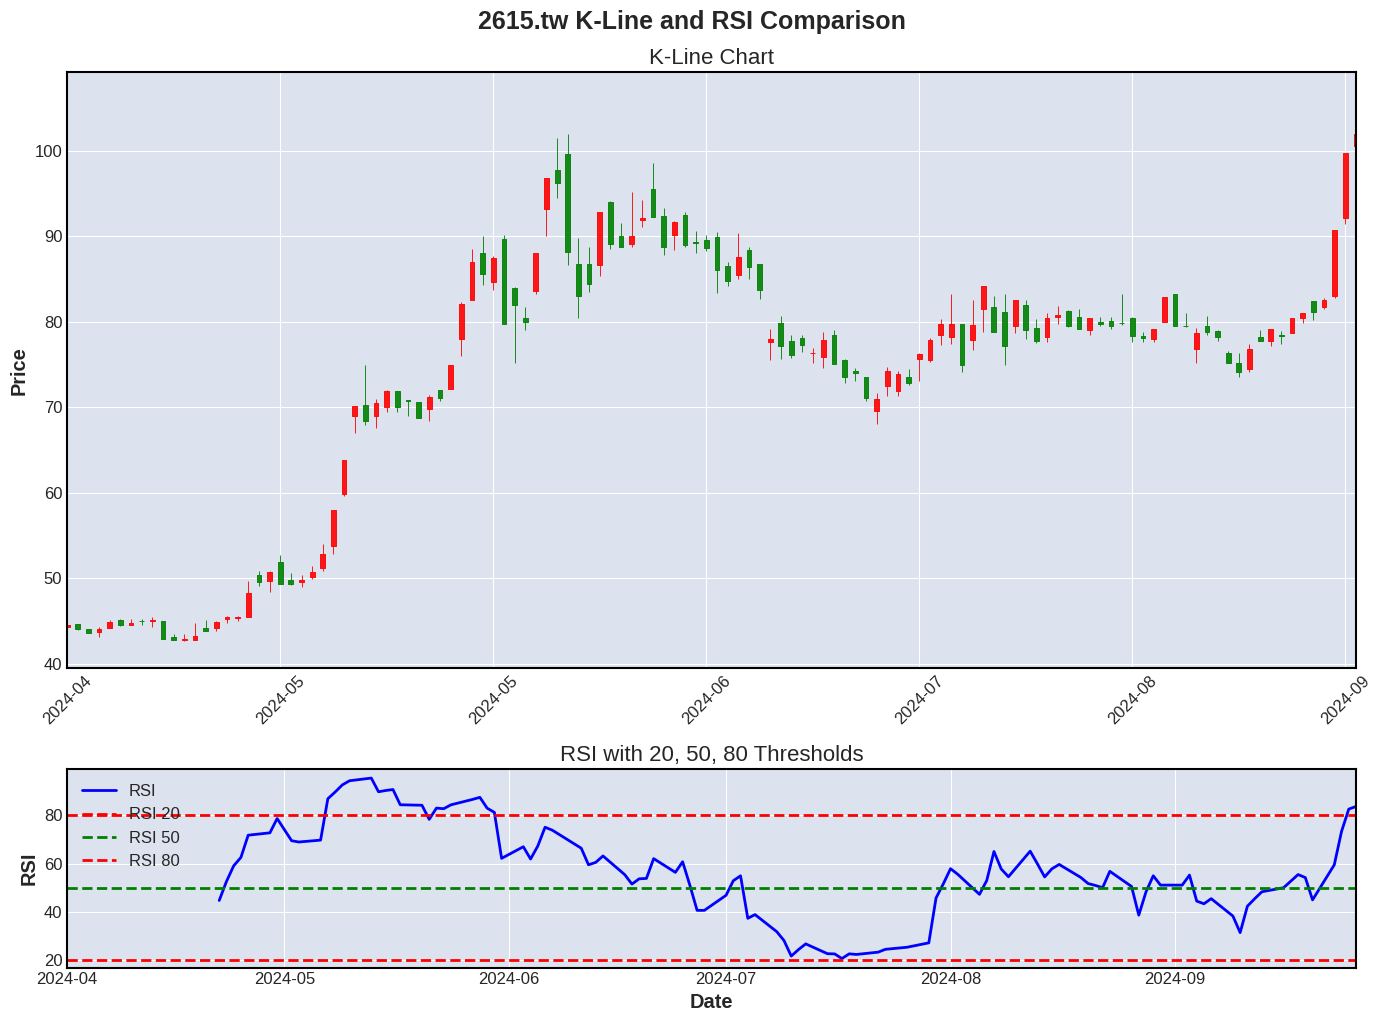

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import pandas as pd

# 確保索引是日期格式
kplot_df.index = pd.to_datetime(kplot_df.index)
df.index = pd.to_datetime(df.index)

# 設定圖形大小
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0])  # K 線圖的軸
ax2 = fig.add_subplot(gs[1])  # RSI 圖的軸
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default', marketcolors=my_color)

# 繪製 K 線圖，設置 x 軸從 2024 年 4 月開始
mpf.plot(kplot_df,
         type='candle',
         style=my_style,
         ax=ax1,  # 設定 x 軸的範圍
         xlim=(pd.Timestamp('2024-04-01'), kplot_df.index[-1]),  # 設定 x 軸的範圍
         datetime_format='%Y-%m',  # 設置 x 軸的日期格式
         volume=False
        )


# 設定 K 線圖的標題和標籤
ax1.set_title('K-Line Chart', fontsize=16)
ax1.set_ylabel('Price')

# 繪製 RSI 圖
ax2.plot(df.index, df['RSI'], label='RSI', color='blue')

# 添加 RSI 的水平線
ax2.axhline(y=20, color='red', linestyle='--', label='RSI 20')
ax2.axhline(y=50, color='green', linestyle='--', label='RSI 50')
ax2.axhline(y=80, color='red', linestyle='--', label='RSI 80')

# 設定 RSI 圖的標題和標籤
ax2.set_title('RSI with 20, 50, 80 Thresholds', fontsize=16)
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')

ax2.set_xlim(pd.Timestamp('2024-04-01'), df.index[-1])

# 顯示圖例
ax2.legend(loc='upper left')

# 調整圖形佈局以避免重疊
plt.tight_layout()
plt.suptitle(f'{stock_id} K-Line and RSI Comparison', fontsize=18, y=1.02)  # 中心標題

# 顯示圖表
plt.show()


## 1.3 計算平滑異同移動平均線（MACD）

In [13]:
'''
第一日
# 平滑係數公式： α = 2 / (span + 1) = 2 / (span + 1)
# α = 2 / (8 + 1) = 2 / (8 + 1) ≈ 0.2222
# 0.2222 * 770.0 + (1-0.2222) * 776.0 = 171.094 + 603.5728 = 774.6668
'''
# 計算12天和26天的指數移動平均線（EMA）
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

# 計算MACD線
df['MACD'] = df['EMA_12'] - df['EMA_26']

# 顯示DataFrame的最後幾行數據
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,8_EMA,...,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_12,EMA_26,MACD
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-01,44.299999,44.700001,44.150002,44.549999,43.744877,3005049,NaN,NaN,NaN,44.549999,...,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,44.549999,44.549999,0.000000
2024-04-02,44.700001,44.700001,43.950001,44.049999,43.253914,4368922,NaN,NaN,NaN,44.438888,...,-0.500000,0.0,0.500000,NaN,NaN,NaN,NaN,44.473076,44.512962,-0.039886
2024-04-03,44.049999,44.099998,43.650002,43.650002,42.861145,5394490,NaN,NaN,NaN,44.263580,...,-0.399998,0.0,0.399998,NaN,NaN,NaN,NaN,44.346449,44.449039,-0.102590


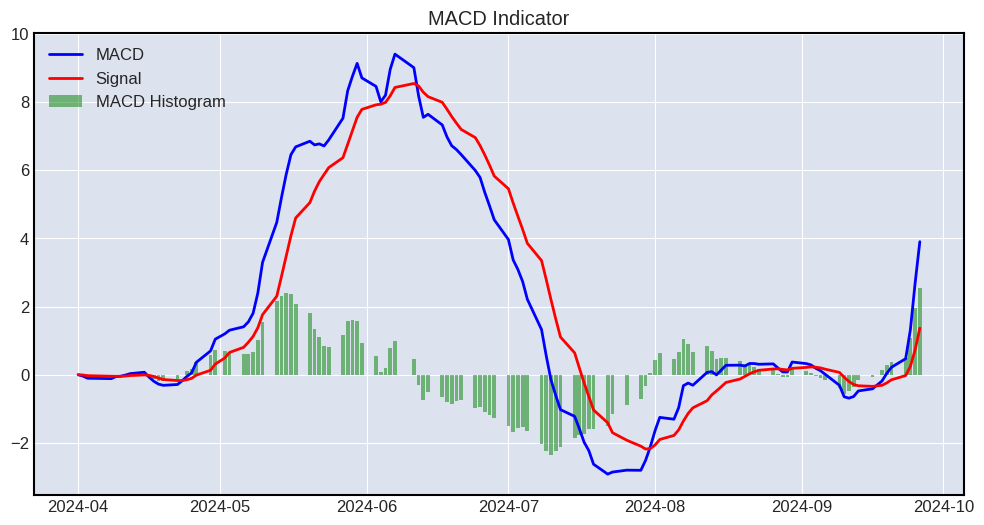

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 計算Signal線，這裡是MACD的9天EMA
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# 計算MACD柱狀圖
df['MACD_Hist'] = df['MACD'] - df['Signal']

# 繪製MACD圖
plt.figure(figsize=(12,6))

# 繪製MACD線
plt.plot(df.index, df['MACD'], label='MACD', color='blue')

# 繪製Signal線
plt.plot(df.index, df['Signal'], label='Signal', color='red')

# 繪製MACD柱狀圖
plt.bar(df.index, df['MACD_Hist'], label='MACD Histogram', color='green', alpha=0.5)

# 添加標題和圖例
plt.title('MACD Indicator')
plt.legend(loc='upper left')

# 顯示圖表
plt.show()

# <b>2. 資料可視化</b>
K 線型態的捕捉

## 2.1 可視化收盤價折線圖

In [15]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '8_SMA',
       '13_SMA', '20_SMA', '8_EMA', '13_EMA', '20_EMA', 'Change', 'Gain',
       'Loss', 'Avg Gain', 'Avg Loss', 'RS', 'RSI', 'EMA_12', 'EMA_26', 'MACD',
       'Signal', 'MACD_Hist'],
      dtype='object')


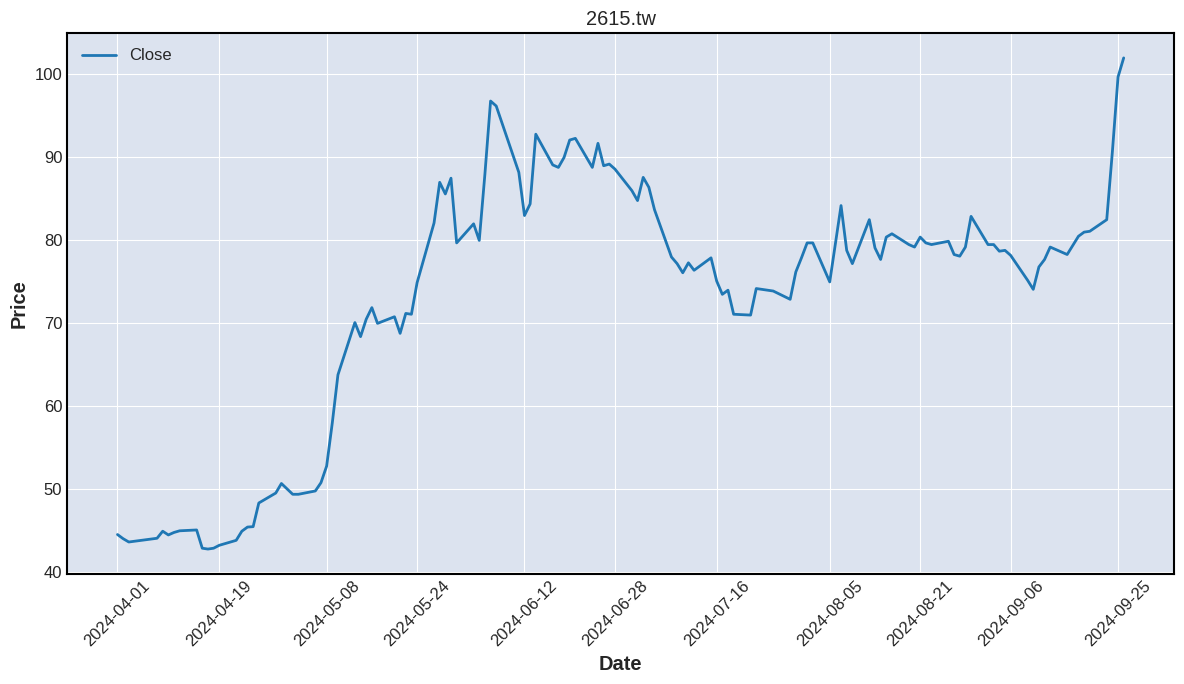

In [16]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間標籤數量
num = 10  # 想在 x 軸上顯示的標籤數量
date = df.index.strftime('%Y-%m-%d')  # 格式化日期為 'YYYY-MM-DD'，此處使用索引作為日期

# 設定 x 軸的刻度和標籤
plt.xticks(df.index[::len(df)//num],  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(df)//num
           date[::len(df)//num],      # 顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(df)//num
           rotation = 45)             # 讓日期標籤旋轉 45 度，以避免標籤之間重疊

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')        # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True)             # 在圖上顯示網格
plt.tight_layout()         # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

## 2.2 加入技術指標

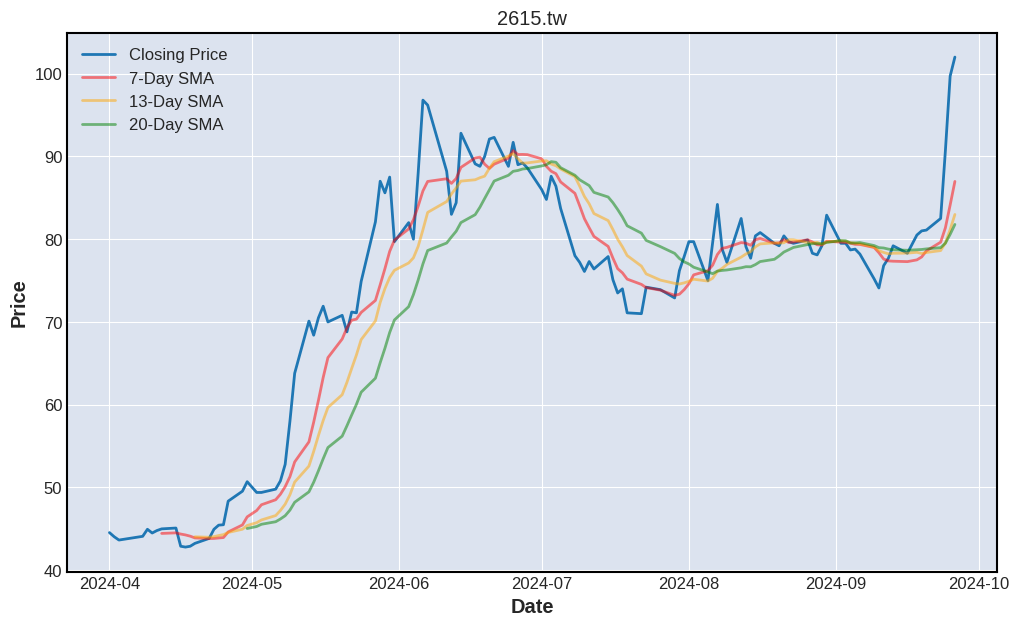

In [17]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df.index, df['Close'], label='Closing Price')

# 8 天的 SMA
plt.plot(df.index, df['8_SMA'], label='7-Day SMA', color='red', alpha=.5)

# 13 天的 SMA
plt.plot(df.index, df['13_SMA'], label='13-Day SMA', color='orange', alpha=.5)

# 20 天的 SMA
plt.plot(df.index, df['20_SMA'], label='20-Day SMA', color='green', alpha=.5)

# 將股票代號設為圖標
plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

## 2.3 K 線

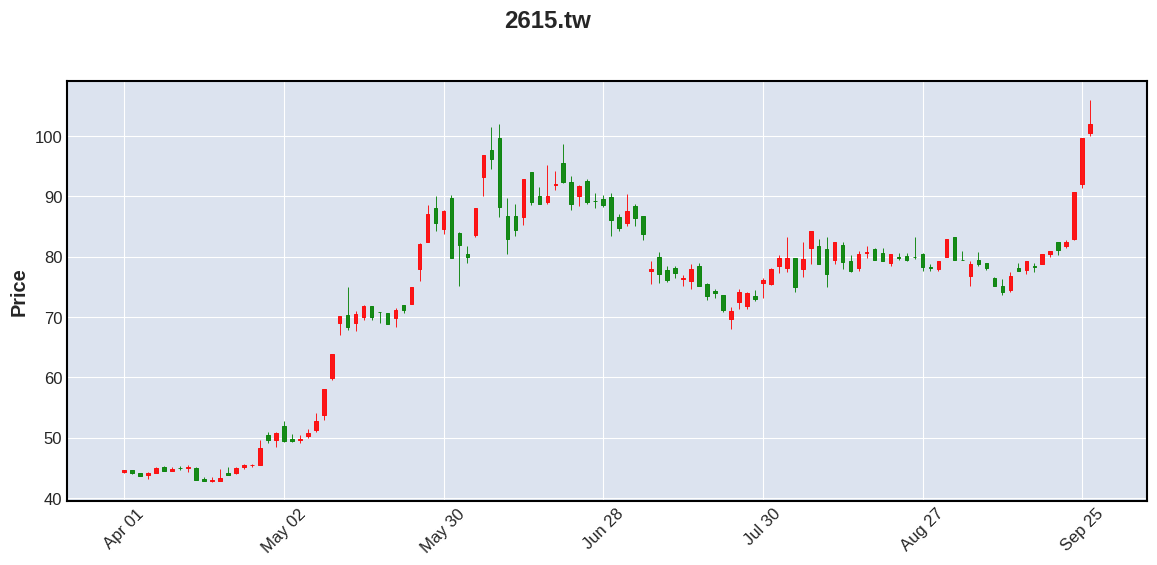

In [18]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

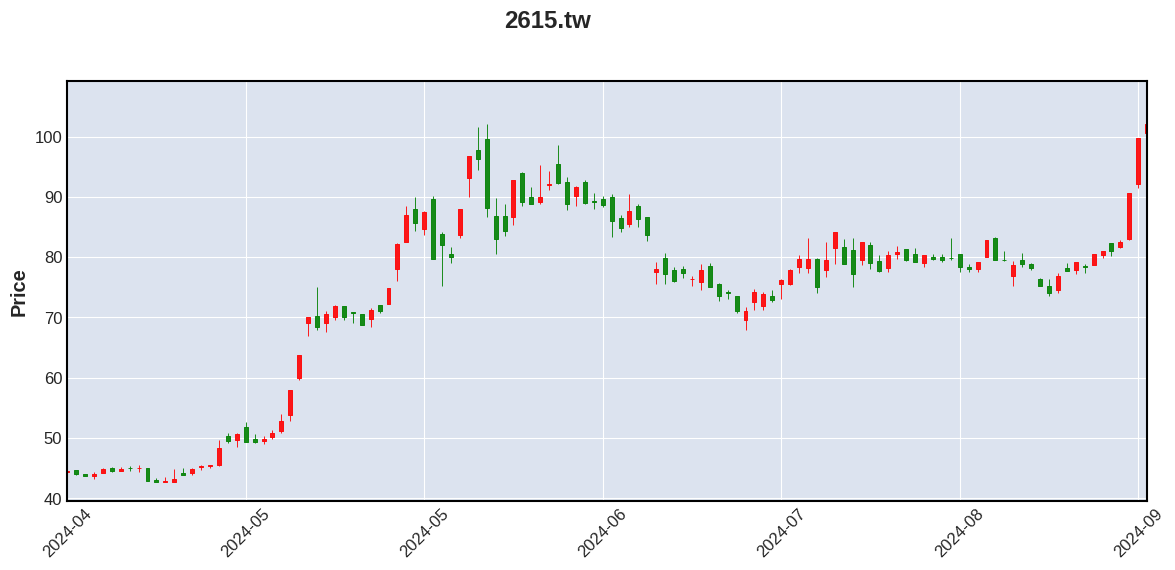

In [19]:
import pandas as pd
import mplfinance as mpf

# 確保索引是日期格式
kplot_df.index = pd.to_datetime(kplot_df.index)

# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default', marketcolors=my_color)

# 繪製 K 線圖，設置 x 軸從 2024 年 4 月開始
mpf.plot(kplot_df,
         type='candle',
         style=my_style,
         title=f'{stock_id}',
         figsize=(15, 6),
         xlim=(pd.Timestamp('2024-04-01'), kplot_df.index[-1]),  # 設定 x 軸的範圍
         datetime_format='%Y-%m'  # 設置 x 軸的日期格式
        )


## 2.4 捕捉 Hammer 型態

錘形線（Hammer）

<img src="https://drive.google.com/uc?id=1M5t0g5kKCm2xfzRaFHfKt_CT41XSRjgb" alt="drawing" width="600"/>

In [20]:
# 計算 K 線長度 = abs(收盤-開盤)
df['body_length'] = abs(df['Close'] - df['Open'])

# 計算下影線長度 = abs(最高-最小)
df['lower_shadow'] = abs(df['Low'] - df[['Open', 'Close']].min(axis=1))

# 計算上影線長度 = abs(最高-最小)
df['upper_shadow'] = abs(df['High'] - df[['Open', 'Close']].max(axis=1))

# 定義 Hammer 型態的條件
hammer_condition = (
    (df['lower_shadow'] > 2 * df['body_length']) &  # 下影線長於實體的两倍
    (df['upper_shadow'] < df['body_length'] * 0.1) &  # 上影線很短
    (df['body_length'] < (df['High'] - df['Low']) * 0.4)  # 實體相對較小
)

# 提取 Hammer 型態
hammer_df = df[hammer_condition]

hammer_df

,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,8_EMA,...,RS,RSI,EMA_12,EMA_26,MACD,Signal,MACD_Hist,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-20,70.900002,70.900002,69.0,70.800003,69.520485,9428323,67.9375,61.207693,56.2025,66.899396,...,5.336737,84.219009,63.788037,56.937828,6.850209,5.048633,1.801576,0.099998,1.800003,0.0


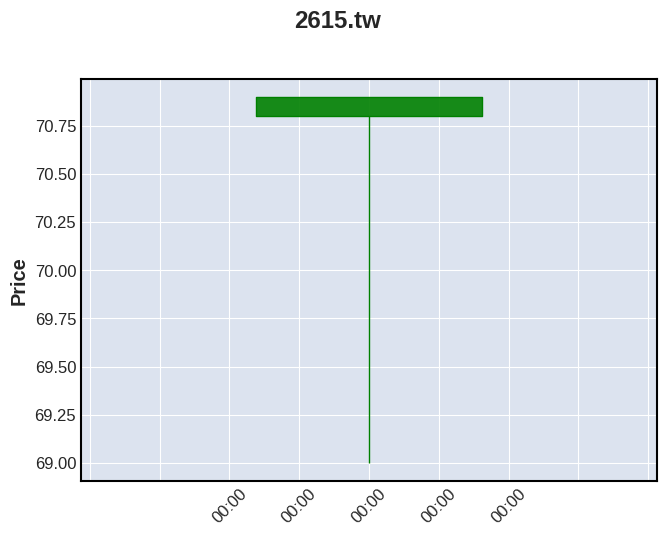

In [21]:
mpf.plot(hammer_df, type='candle', style=my_style, title=f'{stock_id}')

## 2.5 捕捉 Doji 型態

十字線（Doji）

<img src="https://drive.google.com/uc?id=1BDfcn8ZmMVgl0Xlku7mSD338WHeffrgc" alt="drawing" width="600"/>

In [22]:
# 計算 K 線長度
df['body_length'] = abs(df['Close'] - df['Open'])

# 定義Doji型態的條件
# 一般來說，body 長度 如果 小於等於 (最高價-最低價) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # 中間區域非常小
)

# 提取Doji型態
doji_df = df[doji_condition]

doji_df

,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,8_EMA,...,RS,RSI,EMA_12,EMA_26,MACD,Signal,MACD_Hist,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-12,45.000000,45.299999,44.549999,45.000000,44.186745,4566616,44.45000,NaN,NaN,44.610193,...,NaN,NaN,44.559768,44.527612,0.032156,-0.024591,0.056747,0.000000,0.450001,0.299999
2024-04-15,45.000000,45.500000,44.299999,45.099998,44.284939,5639129,44.51875,NaN,NaN,44.719039,...,NaN,NaN,44.642881,44.570011,0.072869,-0.005099,0.077968,0.099998,0.700001,0.400002
2024-05-20,70.900002,70.900002,69.000000,70.800003,69.520485,9428323,67.93750,61.207693,56.202500,66.899396,...,5.336737,84.219009,63.788037,56.937828,6.850209,5.048633,1.801576,0.099998,1.800003,0.000000
2024-06-20,91.900002,94.199997,91.099998,92.099998,92.099998,59036368,88.55000,88.569231,85.965000,89.372527,...,1.166667,53.846152,88.010789,81.404594,6.606195,7.381286,-0.775091,0.199997,0.800003,2.099998
2024-06-27,89.300003,90.599998,88.000000,89.199997,89.199997,35168731,90.23750,89.184616,88.480000,89.760891,...,0.683333,40.594050,89.140711,84.184890,4.955820,6.148611,-1.192790,0.100006,1.199997,1.299995
2024-07-12,76.300003,76.900002,75.199997,76.400002,76.400002,24691082,80.33750,83.100000,85.655000,79.644909,...,0.364102,26.691712,81.321224,82.345021,-1.023796,1.106952,-2.130748,0.099998,1.100006,0.500000
2024-08-16,80.599998,81.800003,79.699997,80.800003,80.800003,24778762,80.08750,79.430769,77.294999,79.599455,...,1.478788,59.657703,79.199138,78.922126,0.277012,-0.226635,0.503647,0.200005,0.900002,1.000000
2024-08-26,79.900002,83.199997,79.599998,79.900002,79.900002,26941839,79.92500,79.592307,79.349999,79.707497,...,1.020979,50.519036,79.533368,79.214760,0.318608,0.168498,0.150110,0.000000,0.300003,3.299995
2024-09-03,79.500000,81.000000,79.400002,79.500000,79.500000,9911640,79.61250,79.730769,79.820000,79.781880,...,1.233766,55.232559,79.668307,79.381811,0.286497,0.229371,0.057125,0.000000,0.099998,1.500000


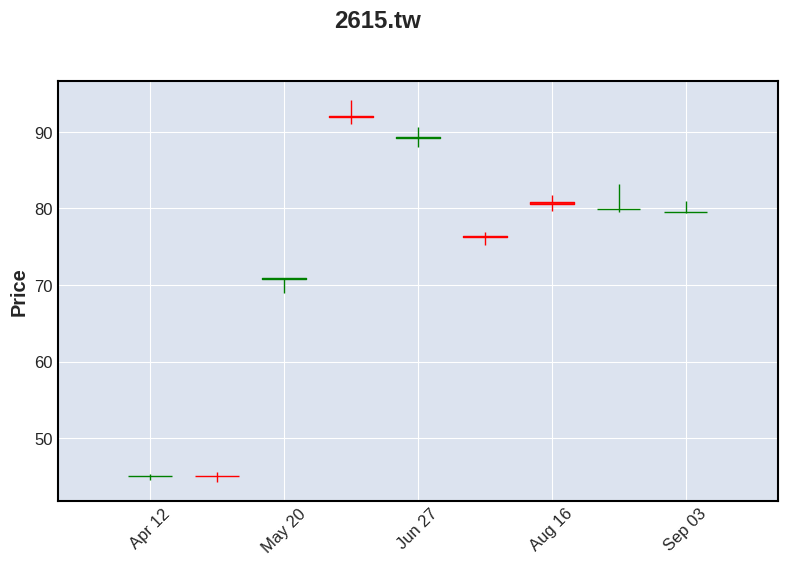

In [23]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

# <b>3. 機器學習預測股價漲跌</b>
技術指標當特徵，用線性回歸、決策樹、隨機森林預測股價漲跌

## 3.1 資料前處理

In [24]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能

In [25]:
# 標籤生成: 預測未來1天的價格，這裡以2024-04-01的技術指標 預測隔天的收盤價
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# 去除缺失值
df.dropna(inplace=True)

# 使用特徵
X = df[['20_SMA', 'RSI', 'MACD']]

# 標籤（未來價格）
y = df['Future_Price']

X.shape, y.shape

((102, 3), (102,))

In [26]:
# 將數據集 X 和標籤 y 拆分為訓練集和測試集
# test_size=0.2 表示測試集佔全部數據的 20% --> 80% 的資料作為訓練，20% 的資料作為測試
# shuffle=False 表示在拆分數據時不打亂原始數據的順序
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 查看拆分後訓練集和測試集的形狀
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((81, 3), (21, 3), (81,), (21,))

## 3.2 線性回歸（Linear Regression）

In [27]:
# 引入線性回歸模型
from sklearn.linear_model import LinearRegression

# 建立並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"線性回歸模型RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格: {future_pred[0]:.2f}")

線性回歸模型RMSE: 4.51
線性回歸模型預測未來1天的價格: 91.79


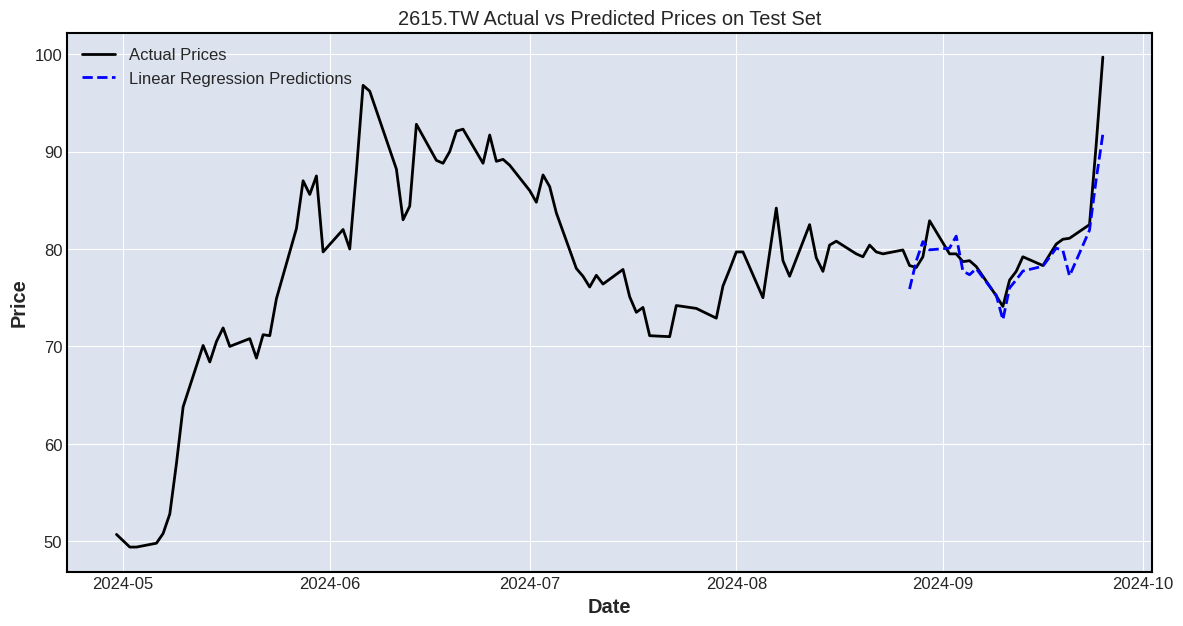

In [28]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df.index[-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2615.TW Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.2 決策樹（Decision Tree）

決策樹模型RMSE: 6.28
決策樹模型預測未來1天的價格: 88.20


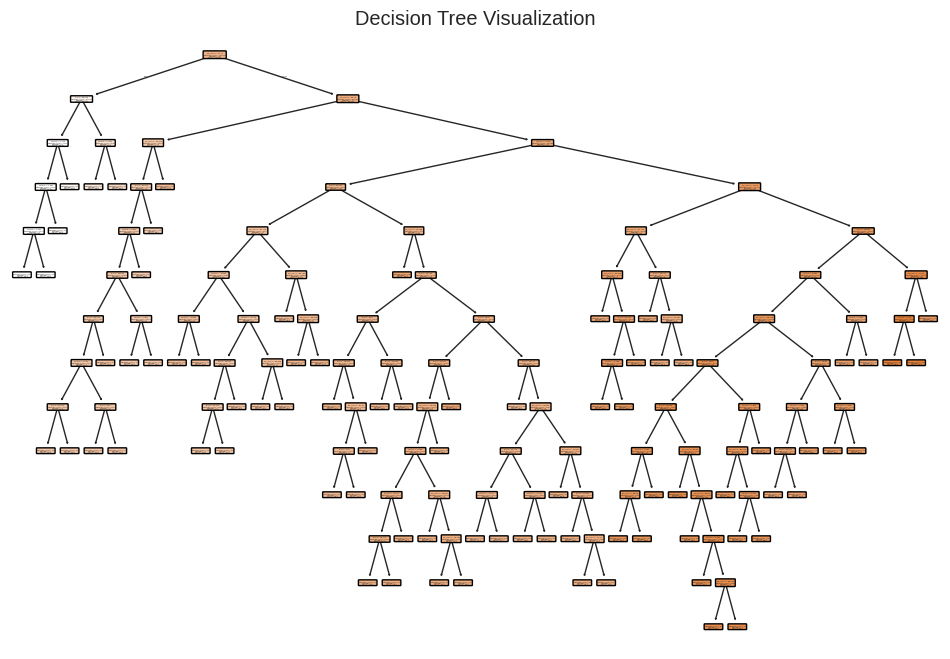

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

# 建立並訓練決策樹模型
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"決策樹模型RMSE: {rmse:.2f}")

# 預測未來價格
future_pred = model.predict(X[-1:])
print(f"決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

# 可視化決策樹
plt.figure(figsize=(12, 8))  # 設定畫布大小
plot_tree(model, filled=True, feature_names=X_train.columns, rounded=True)  # 設定特徵名稱
plt.title("Decision Tree Visualization")
plt.show()

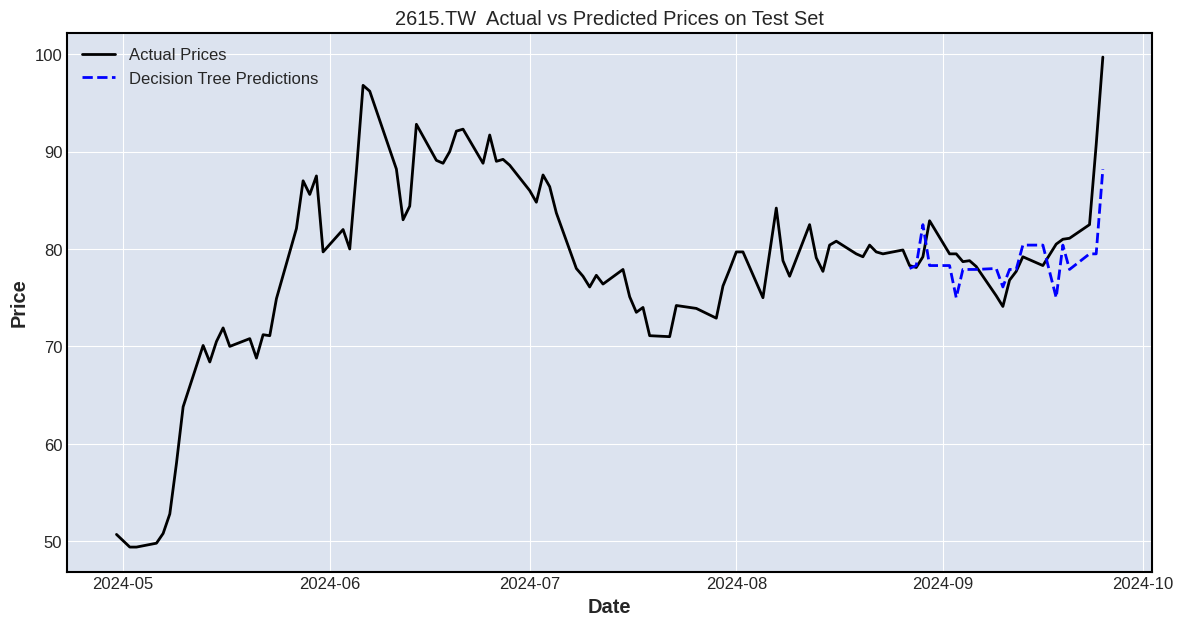

In [30]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df.index[-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2615.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.3 隨機森林（Random Forest）

In [44]:
# 引入隨機森林模型
from sklearn.ensemble import RandomForestRegressor

# 建立並訓練決策數模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"隨機森林模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"隨機森林模型預測未來{n}天的價格: {future_pred[0]:.2f}")

隨機森林模型RMSE: 6.58
隨機森林模型預測未來1天的價格: 85.48


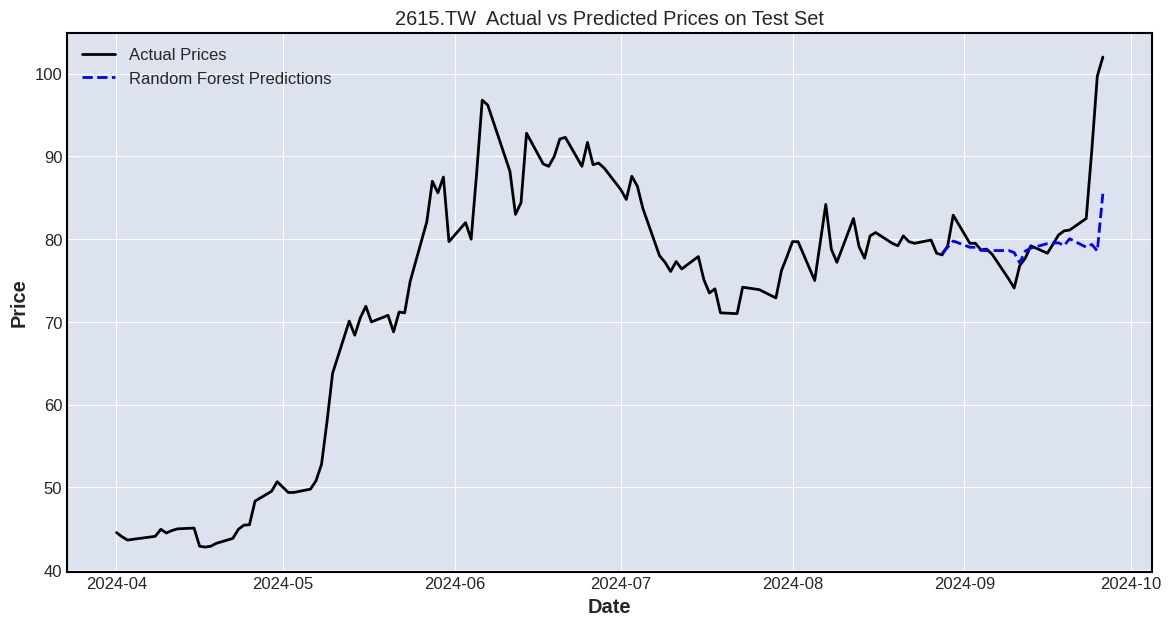

In [45]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df.index[-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2615.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# Pandas Shift

In [33]:
temp_df = pd.DataFrame({
    'Date': ['2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05', '2024-02-06'],
    'Close': [111, 222, 333, 444, 555, 666]
})
temp_df

,Date,Close
0,2024-02-01,111
1,2024-02-02,222
2,2024-02-03,333
3,2024-02-04,444
4,2024-02-05,555
5,2024-02-06,666


In [34]:
sample_df = pd.DataFrame({
    'Date': ['2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05', '2024-02-06'],
    'SMA': ['SMA_1', 'SMA_2', 'SMA_3', 'SMA_4', 'SMA_5', 'SMA_6'],
    'RSI': ['RSI_1', 'RSI_2', 'RSI_3', 'RSI_4', 'RSI_5', 'RSI_6'],
    'MACD': ['MACD_1', 'MACD_2', 'MACD_3', 'MACD_4', 'MACD_5', 'MACD_6'],
    'Close': [111, 222, 333, 444, 555, 666]
})
sample_df

,Date,SMA,RSI,MACD,Close
0,2024-02-01,SMA_1,RSI_1,MACD_1,111
1,2024-02-02,SMA_2,RSI_2,MACD_2,222
2,2024-02-03,SMA_3,RSI_3,MACD_3,333
3,2024-02-04,SMA_4,RSI_4,MACD_4,444
4,2024-02-05,SMA_5,RSI_5,MACD_5,555
5,2024-02-06,SMA_6,RSI_6,MACD_6,666


In [35]:
sample_df['Future_Close'] = sample_df['Close'].shift(-1)
sample_df

,Date,SMA,RSI,MACD,Close,Future_Close
0,2024-02-01,SMA_1,RSI_1,MACD_1,111,222.0
1,2024-02-02,SMA_2,RSI_2,MACD_2,222,333.0
2,2024-02-03,SMA_3,RSI_3,MACD_3,333,444.0
3,2024-02-04,SMA_4,RSI_4,MACD_4,444,555.0
4,2024-02-05,SMA_5,RSI_5,MACD_5,555,666.0
5,2024-02-06,SMA_6,RSI_6,MACD_6,666,NaN
